In [1]:
import pandas as pd
import glob
pd.options.mode.chained_assignment = None 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Haarsteeg level
path5 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/rg8170_N99"
#Haarsteeg flow
path6 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/rg8170_99"


## Flow in Haarsteeg

In [3]:
df_flow = pd.concat([pd.read_csv(file) for file in glob.glob(path6 + "/*.csv")], ignore_index = True)
df_flow['TimeStamp'] = pd.to_datetime(df_flow['datumBeginMeting'])

df_flow['Year'] = df_flow['TimeStamp'].dt.year
df_flow['Month'] = df_flow['TimeStamp'].dt.month_name()
df_flow['Day'] = df_flow['TimeStamp'].dt.day
df_flow['Date'] = pd.DatetimeIndex(df_flow.TimeStamp).normalize()

In [4]:
flow_18 = df_flow[df_flow['Year'] == 2018]
flow_19 = df_flow[df_flow['Year'] == 2019]

months18 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
            'September', 'October', 'November', 'December']
months19 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

In [5]:
def Barplots(months, df):
    plt.rcParams['figure.figsize'] = 6,30
    fig, ax = plt.subplots(len(months),1);
    fig.subplots_adjust(hspace=0.8, wspace=0.4)
    for i, month in enumerate(months):
        group = df[df['Month'] == month].groupby('Day')['hstWaarde'].mean()
        ax[i].bar(np.arange(1,len(group)+1), list(group))
        ax[i].set_title(month + ' flow')
        ax[i].set_xlabel('Day of the month')
        ax[i].set_ylabel('Daily average flow in m³')

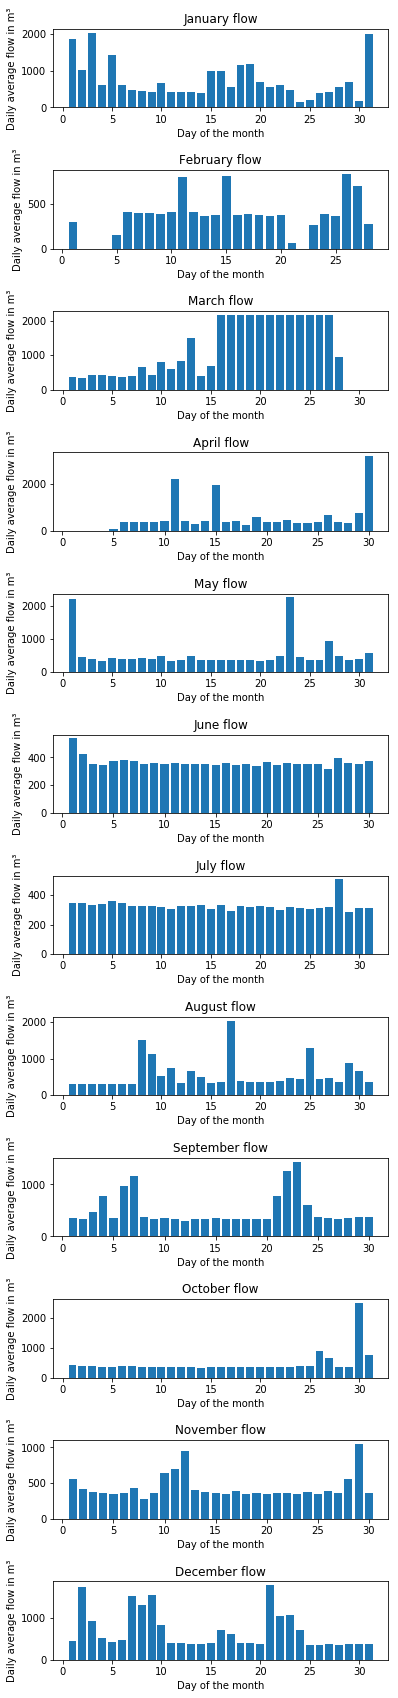

In [6]:
Barplots(months18, flow_18)

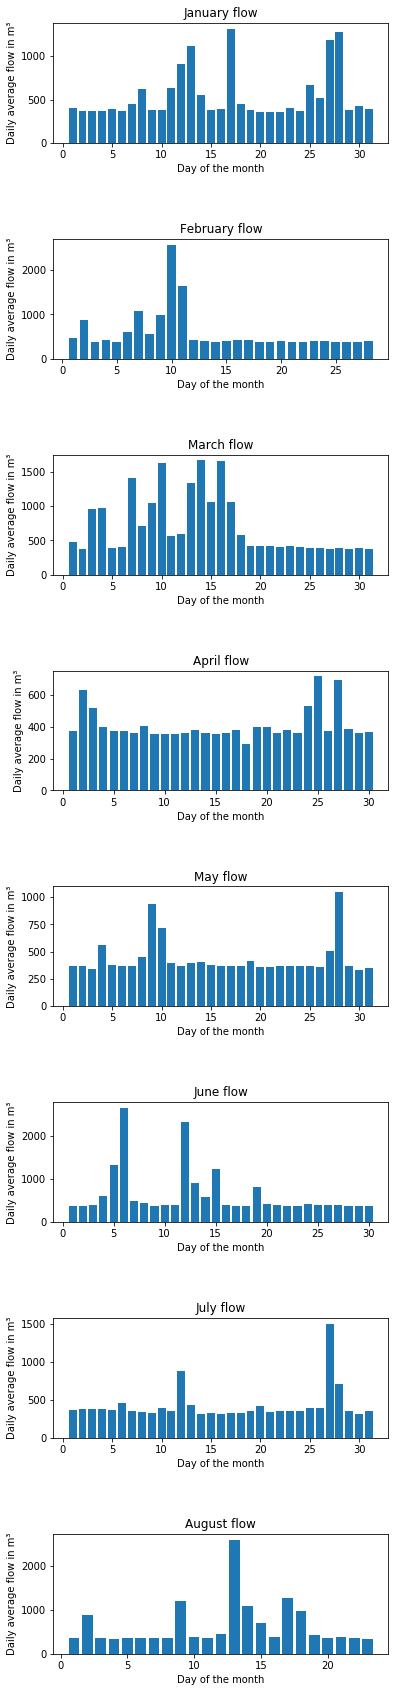

In [7]:
Barplots(months19, flow_19)

In [8]:
# just some testing - ignore

# mond = dry_haar[dry_haar['Weekday'] == 'Monday']
# # g = mond.groupby(['Hour'])[['hstWaarde']].mean()

# # g = mond.groupby(['Hour']).agg(
# #     {
# #         'hstWaarde': ['mean', 'std']
# #     }
# # )
# std_mon = mond['hstWaarde'].std()
# g = mond.groupby(['Hour'])[['hstWaarde']].mean()

# # Create a figure with customized size
# fig = plt.figure(figsize=(20, 5))
# ax = fig.add_subplot(111)

# # Set the axis lables
# ax.set_xlabel('Hour of the day', fontsize = 18)
# ax.set_ylabel('Flow', fontsize = 18)

# xaxis = g.index

# # Create an error bar for each dataset
# # ax.errorbar(xaxis, g['hstWaarde'], yerr=std_mon);
# ax.plot(xaxis, g['hstWaarde']);

## Using Roger's pickle file
## Flow with rain, Haarsteeg & Bokhoven

In [9]:
combined_rain_pump_hour = pd.read_pickle("../data/combined_data/combined_rain_pump_1hour.pickle")
combined_rain_pump_hour.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
datumBeginMeting,,,,,,
2017-12-31 23:00:00,0.0000,0.0000,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4


In [10]:
# add year, month and day to the data
combined_rain_pump_hour['time'] = combined_rain_pump_hour.index
combined_rain_pump_hour['Year'] = combined_rain_pump_hour['time'].dt.year
combined_rain_pump_hour['Month'] = combined_rain_pump_hour['time'].dt.month_name()
combined_rain_pump_hour['Day'] = combined_rain_pump_hour['time'].dt.day

In [11]:
# select data from 2018, 2019
y18 = combined_rain_pump_hour[combined_rain_pump_hour['Year'] == 2018]
y19 = combined_rain_pump_hour[combined_rain_pump_hour['Year'] == 2019]

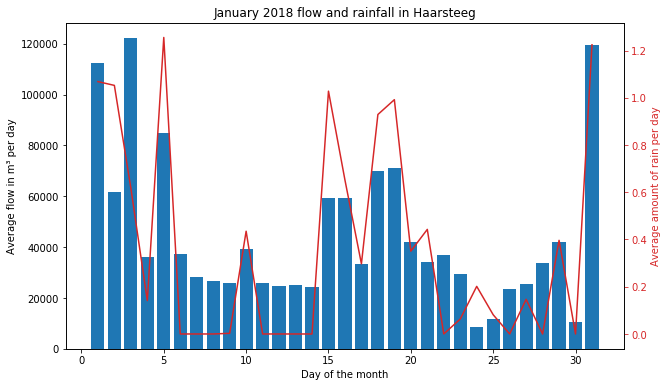

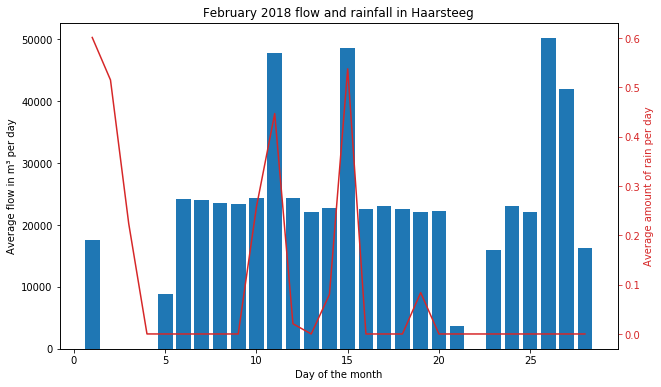

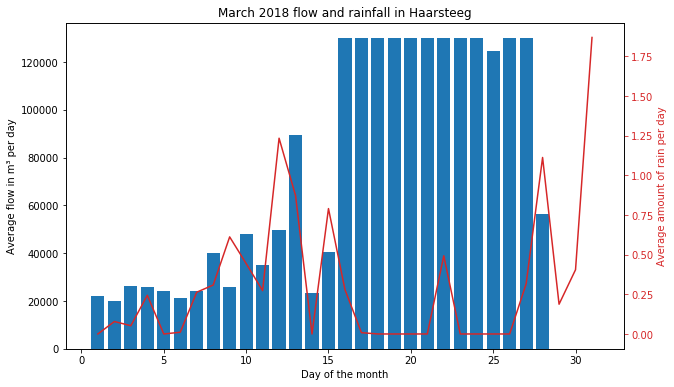

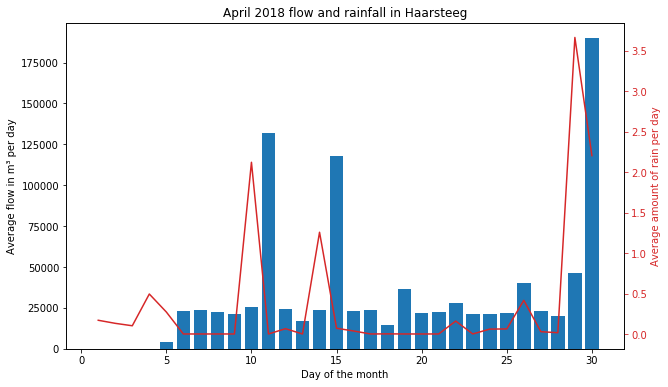

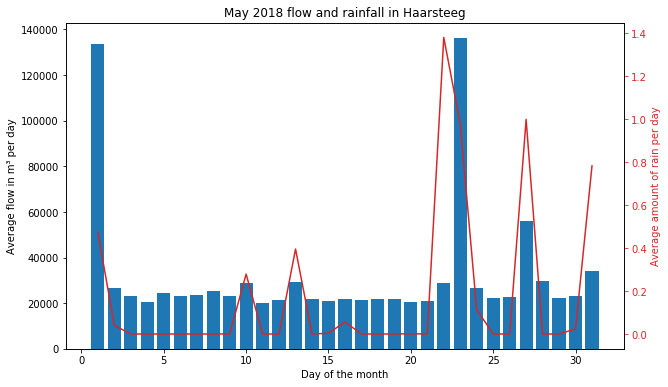

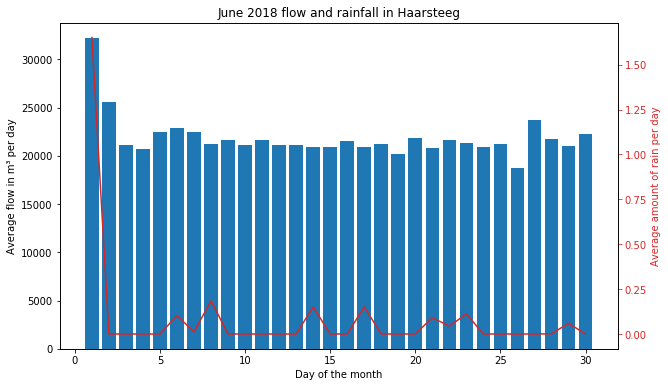

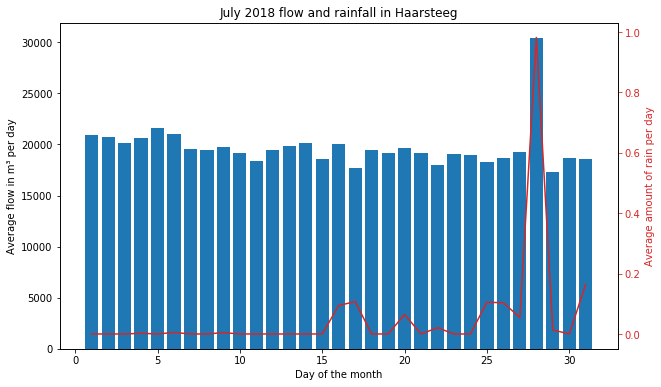

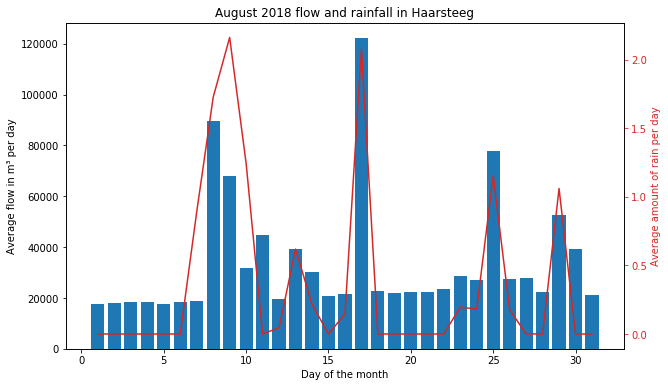

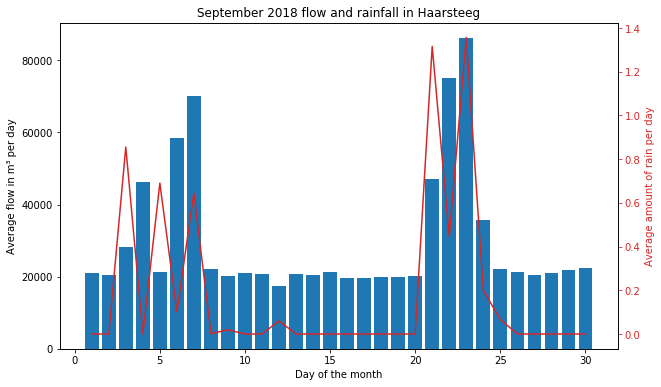

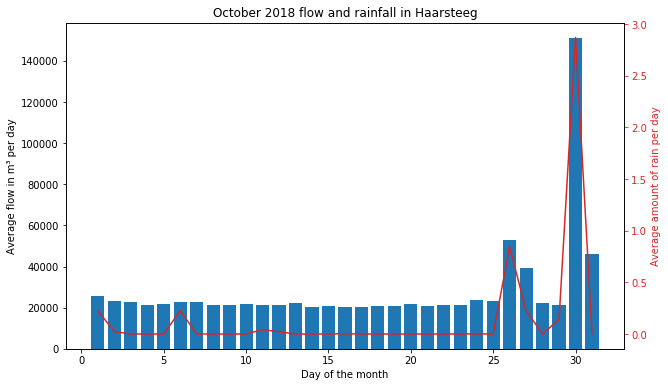

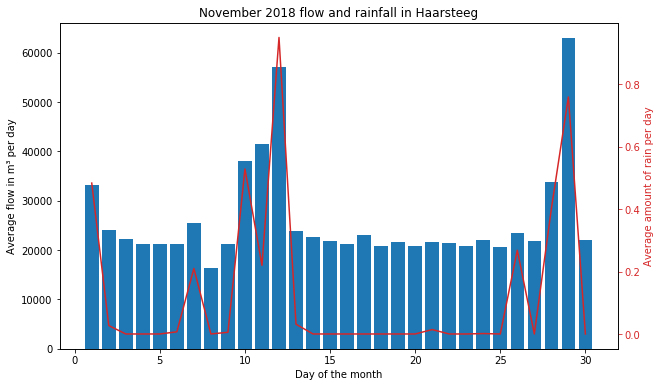

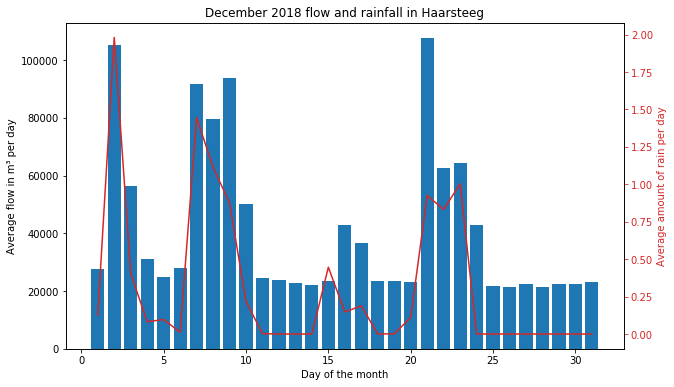

In [12]:
# visualize rain with flow 

plt.rcParams['figure.figsize'] = 10,6
#fig, ax = plt.subplots(12,1);
#fig.subplots_adjust(hspace=0.6, wspace=0.4)
#ax2=ax.twinx()

for i, month in enumerate(months18):
    group = y18[y18['Month'] == month].groupby('Day')[['RG8170_flow', 'RG8170_level', 'Haarsteeg']].mean()
    
    fig, ax = plt.subplots()
    
    ax.bar(np.arange(1, len(group)+1), group['RG8170_flow'])
    ax.set_title(month + ' 2018 flow and rainfall in Haarsteeg')
    ax.set_xlabel('Day of the month')
    ax.set_ylabel('Average flow in m³ per day')
    
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.plot(np.arange(1, len(group)+1), group['Haarsteeg'], color=color);
    ax2.set_ylabel('Average amount of rain per day', color=color);
    ax2.tick_params(colors=color)

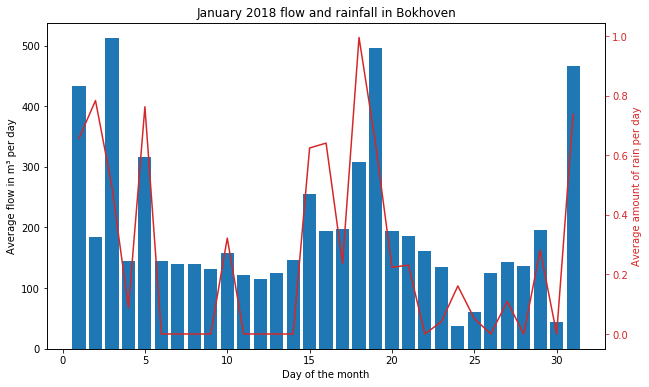

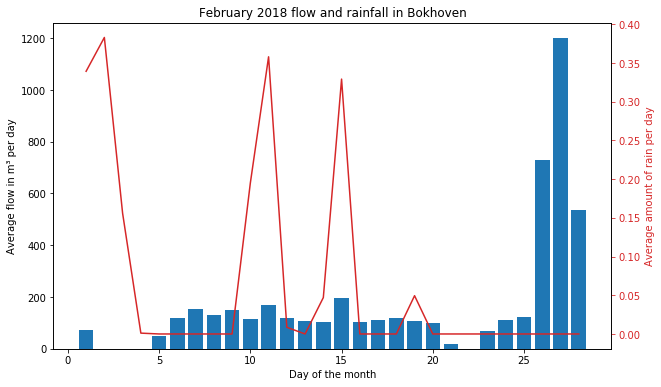

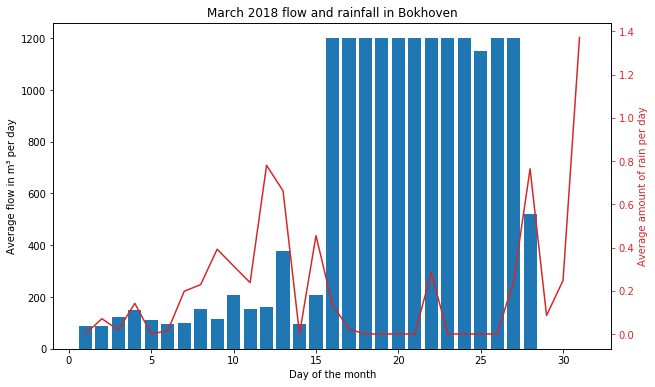

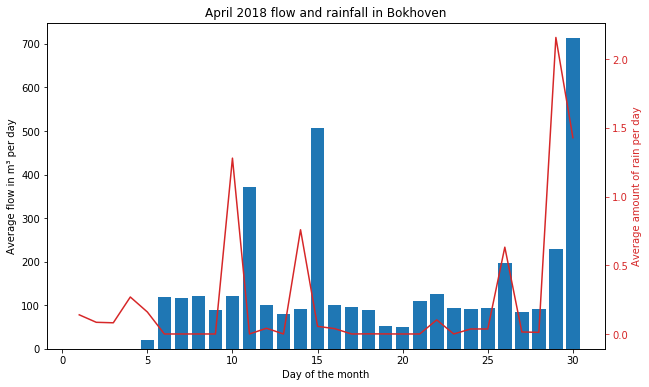

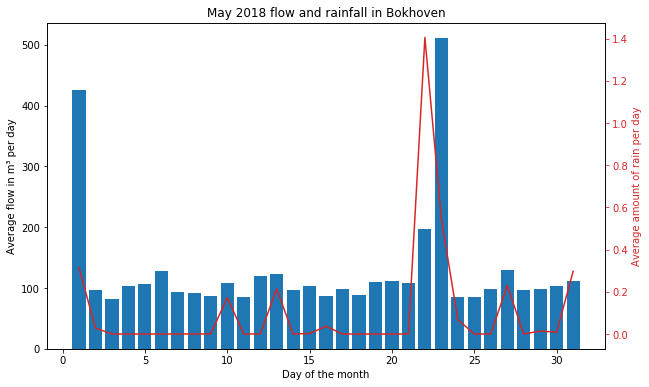

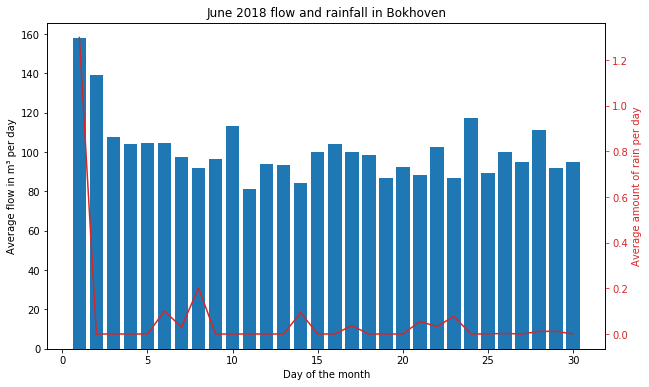

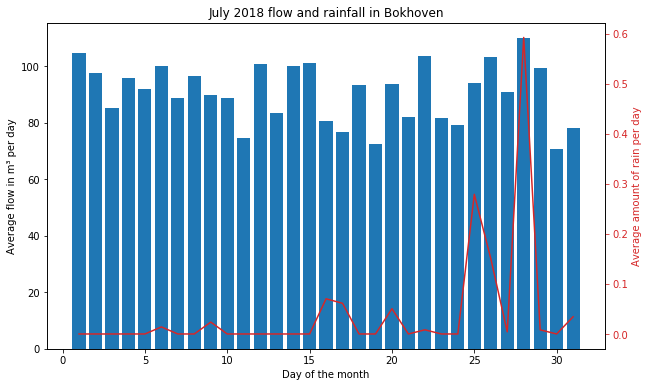

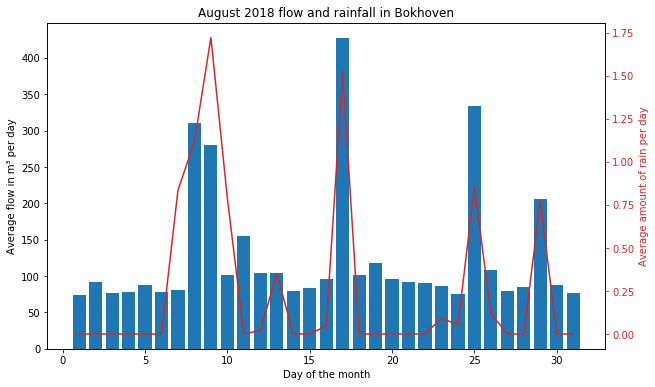

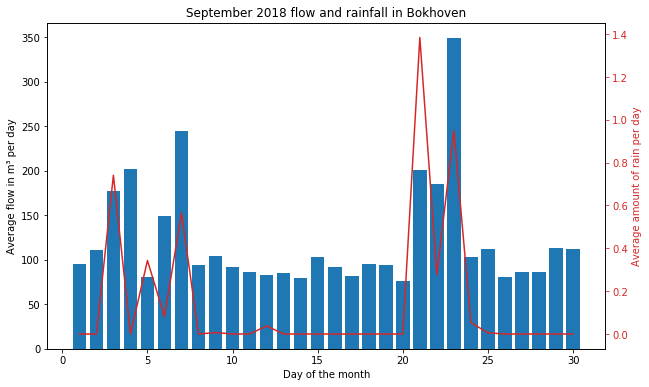

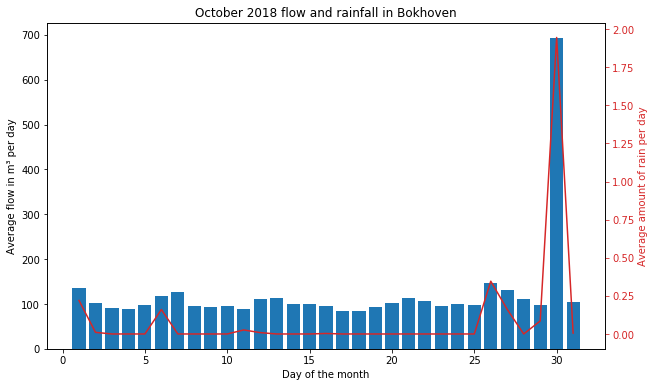

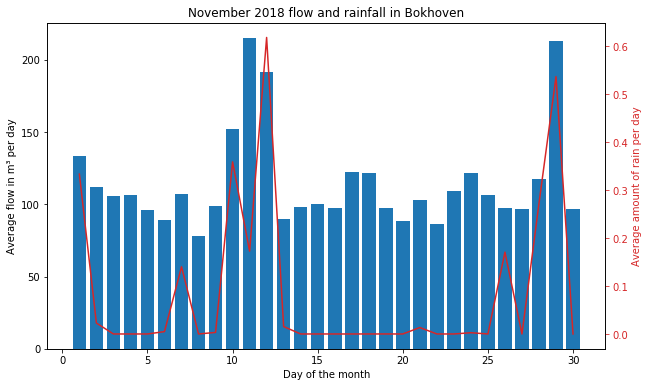

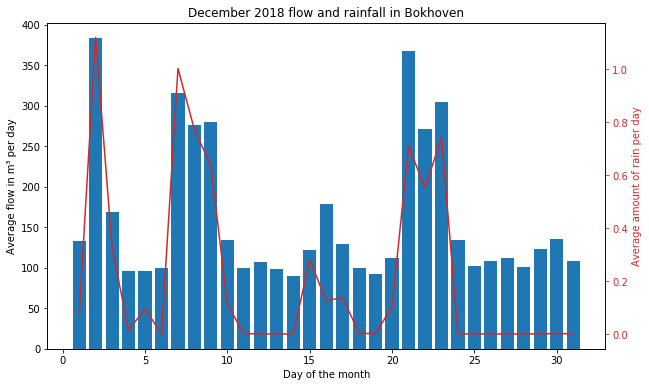

In [13]:
plt.rcParams['figure.figsize'] = 10,6

for i, month in enumerate(months18):
    group = y18[y18['Month'] == month].groupby('Day')[['RG8180_flow', 'RG8180_level', 'Bokhoven']].mean()
    
    fig, ax = plt.subplots()
    
    ax.bar(np.arange(1, len(group)+1), group['RG8180_flow'])
    ax.set_title(month + ' 2018 flow and rainfall in Bokhoven')
    ax.set_xlabel('Day of the month')
    ax.set_ylabel('Average flow in m³ per day')
    
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.plot(np.arange(1, len(group)+1), group['Bokhoven'], color=color);
    ax2.set_ylabel('Average amount of rain per day', color=color);
    ax2.tick_params(colors=color);

# average dry day flow per weekday with sd

In [14]:
# add extra variables date, weekday and hour
combined_rain_pump_hour['Date'] = pd.DatetimeIndex(combined_rain_pump_hour.time).normalize()
combined_rain_pump_hour['Weekday'] = combined_rain_pump_hour['time'].dt.day_name()
combined_rain_pump_hour['Hour'] = combined_rain_pump_hour['time'].dt.hour

# remove one row from 2017
combined_rain_pump_hour = combined_rain_pump_hour[combined_rain_pump_hour['Year'] != 2017]

In [15]:
# select every day from the dataset that was fully dry

rain_sum_day = combined_rain_pump_hour.groupby('Date')[['Haarsteeg', 'Bokhoven']].sum()

# in Haarsteeg
dry_h = rain_sum_day[rain_sum_day['Haarsteeg'] == 0]
dry_haarsteeg = combined_rain_pump_hour.loc[combined_rain_pump_hour['Date'].isin(dry_h.index)]

# in Bokhoven
dry_b = rain_sum_day[rain_sum_day['Bokhoven'] == 0]
dry_bokhoven = combined_rain_pump_hour.loc[combined_rain_pump_hour['Date'].isin(dry_b.index)]

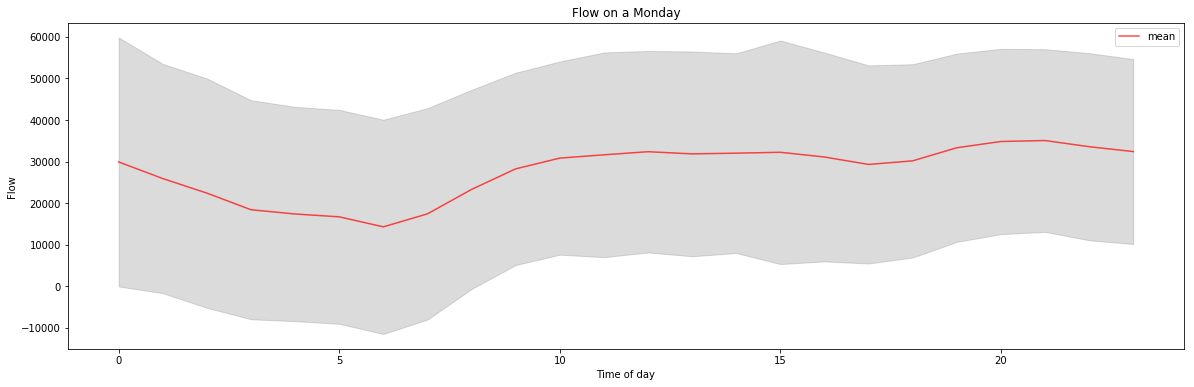

In [16]:
# test vis for dry flow on an average Monday with standard deviation 
mon = dry_haarsteeg[dry_haarsteeg['Weekday'] == 'Monday']
gr = mon.groupby(['Hour']).agg({'RG8170_flow': ['mean', 'std']})

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(gr.index, gr['RG8170_flow']['mean'], alpha=0.7, color='red', linewidth = 1.5)
ax.fill_between(gr.index, gr['RG8170_flow']['mean'] - gr['RG8170_flow']['std'], gr['RG8170_flow']['mean'] + gr['RG8170_flow']['std'], color='#888888', alpha=0.3)
ax.legend(loc='best')
ax.set_ylabel("Flow")
ax.set_xlabel("Time of day")
ax.set_title('Flow on a Monday');

In [17]:
combined_rain_pump_hour.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level,time,Year,Month,Day,Date,Weekday,Hour
datumBeginMeting,,,,,,,,,,,,,
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5,2018-01-01 00:00:00,2018,January,1,2018-01-01,Monday,0
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8,2018-01-01 01:00:00,2018,January,1,2018-01-01,Monday,1
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9,2018-01-01 02:00:00,2018,January,1,2018-01-01,Monday,2
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4,2018-01-01 03:00:00,2018,January,1,2018-01-01,Monday,3
2018-01-01 04:00:00,0.0044,0.1340,150.0,20.6,118481.8,-82.3,2018-01-01 04:00:00,2018,January,1,2018-01-01,Monday,4


## using the separate files for Haarsteeg & Bokhoven
Just to be able to do the same vis but with more datapoints per each day

In [18]:
# adding extra variables
# df_flow was defined earlier and is a df with flow for Haarsteeg
df_flow['Weekday'] = df_flow['TimeStamp'].dt.day_name()
df_flow['Hour'] = df_flow['TimeStamp'].dt.hour
df_flow['TimeOfDay'] = df_flow['TimeStamp'].dt.time

# selecting only the measurements on fully dry days
dry_haar = df_flow.loc[df_flow['Date'].isin(dry_h.index)]

In [23]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def SmallIntervalDataPlot(df, weekdays):
    '''
    Input:  df with flow data of a pump only on dry days
            list of weekdays
    Output: 7 lineplots with the shaded area marking the area one standard deviation away from each measurement
    '''
    for weekday in weekdays:

        day = df[df['Weekday'] == weekday]
        g = day.groupby(['TimeOfDay']).agg({'hstWaarde': ['mean', 'std']})

        fig, ax = plt.subplots(figsize=(20, 6))
        ax.grid()
        ax.plot(g.index ,g['hstWaarde']['mean'], alpha=0.7, color='red', linewidth = 1.5)
        ax.fill_between(g.index, g['hstWaarde']['mean'] - g['hstWaarde']['std'], g['hstWaarde']['mean'] + g['hstWaarde']['std'], color='#888888', alpha=0.3)
        ax.set_ylabel("Flow", fontsize=15)
        ax.set_xlabel("Time of day", fontsize=15)
        ax.set_title('Flow on a ' + weekday, fontsize=18);

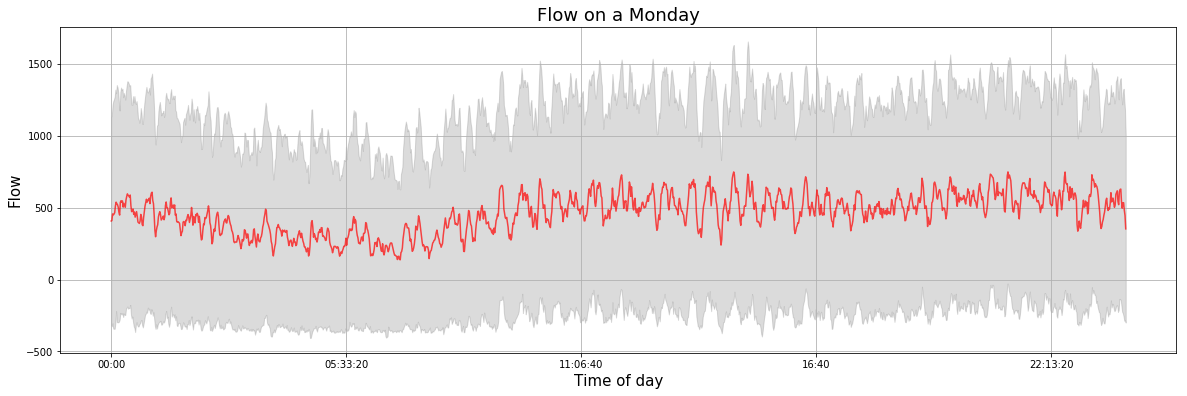

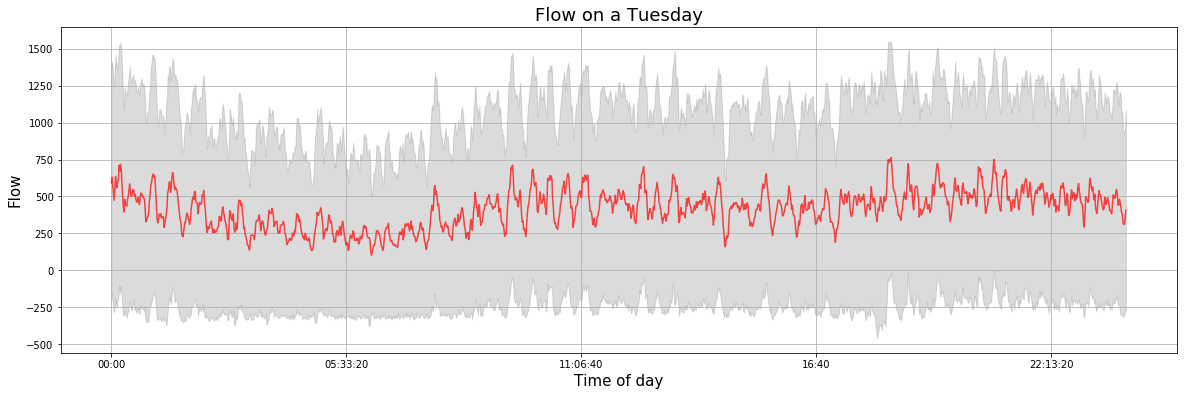

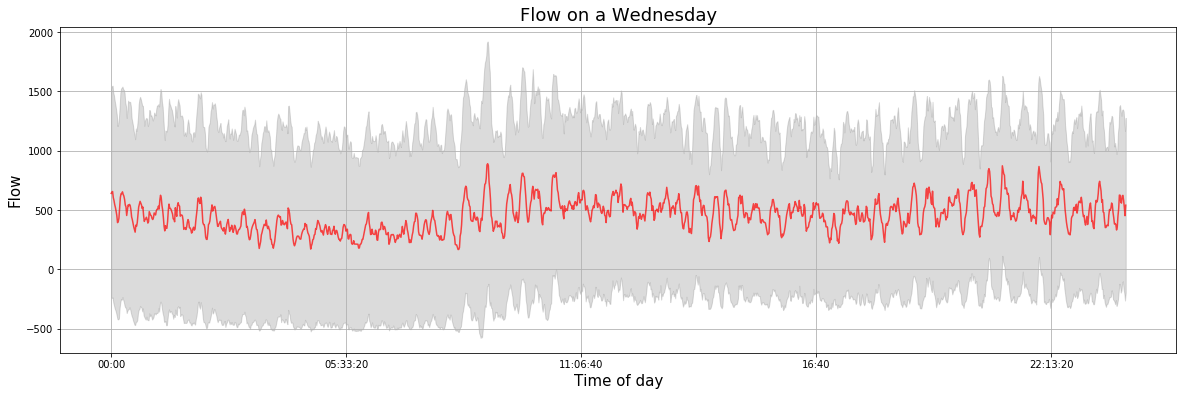

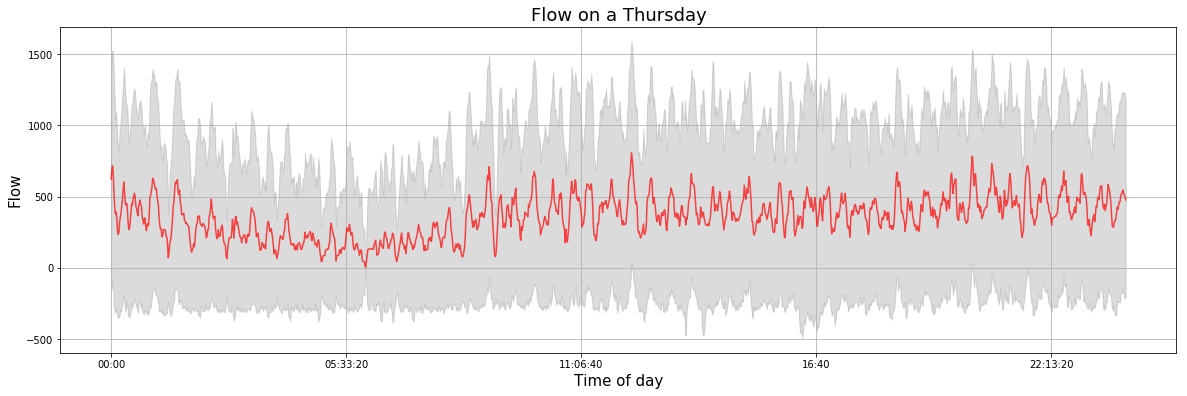

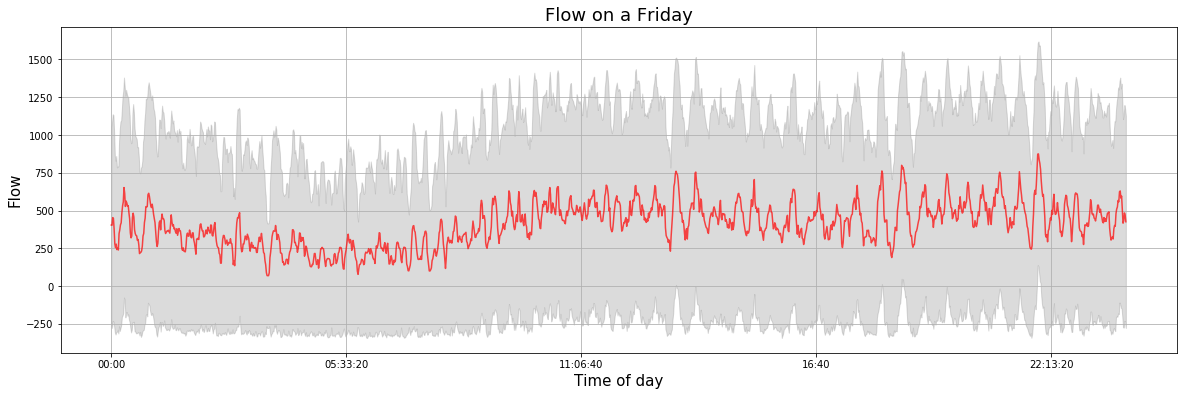

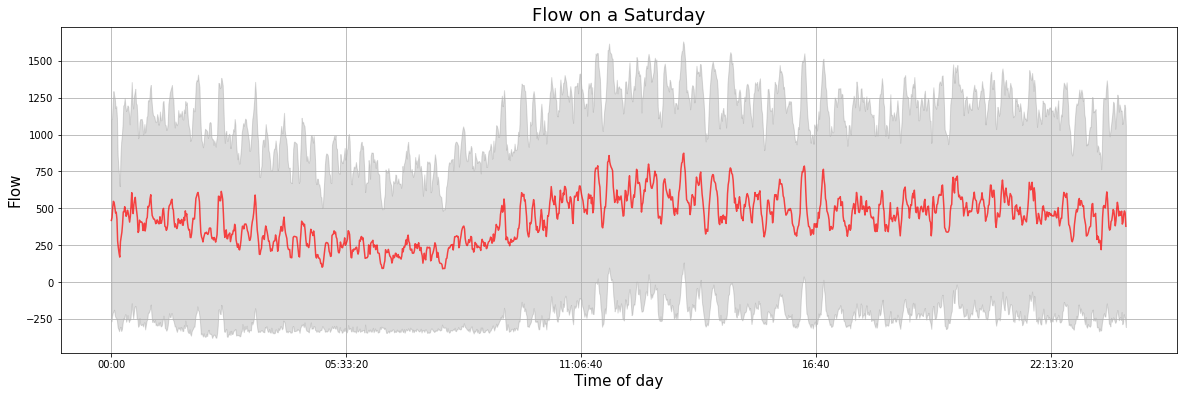

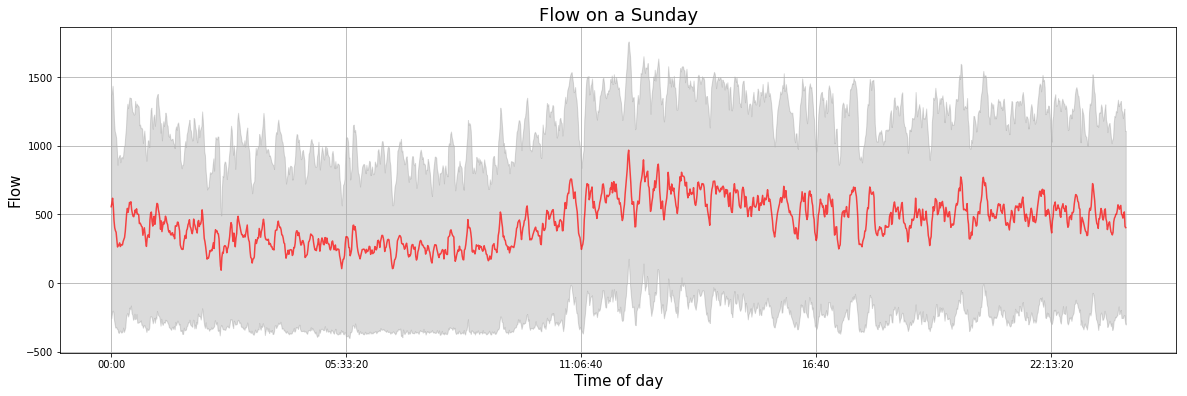

In [24]:
# plots for dry days in Haarsteeg
SmallIntervalDataPlot(dry_haar, weekdays)